# Breath of the Wild Speedrunning

In [1]:
import json

import pandas as pd

%matplotlib inline

If you go to https://www.speedrun.com/botw/gamestats and open the console, you can fetch the speedrun record data from the graph by opening the console and typing
```javascript
copy(JSON.stringify(runs[0][0].data));
```
and then paste it into triple quoted strings

In [2]:
runs = json.loads("""[{"x":1488542400,"y":8567,"players":["SethBling"]},{"x":1488888000,"y":3853.4,"players":["Venick"]},{"x":1489147200,"y":3481,"players":["gymnast86"]},{"x":1489492800,"y":3193,"players":["gymnast86"]},{"x":1489665600,"y":3100,"players":["gymnast86"]},{"x":1489752000,"y":3090,"players":["Baltan"]},{"x":1489924800,"y":2879,"players":["sva"]},{"x":1490184000,"y":2800.5,"players":["Baltan"]},{"x":1490270400,"y":2751,"players":["sva"]},{"x":1490356800,"y":2665.1,"players":["ChaoticAce"]},{"x":1491048000,"y":2640,"players":["Ikkitrix"]},{"x":1491220800,"y":2566.1,"players":["Ikkitrix"]},{"x":1492257600,"y":2523,"players":["sva"]},{"x":1492776000,"y":2394.5,"players":["sva"]},{"x":1520510400,"y":2351,"players":["Wolhaiksong"]},{"x":1531742400,"y":2308,"players":["Wolhaiksong"]},{"x":1532520000,"y":2296,"players":["Wolhaiksong"]},{"x":1535198400,"y":2278,"players":["Wolhaiksong"]},{"x":1536753600,"y":2200,"players":["Wolhaiksong"]},{"x":1537531200,"y":2081.2,"players":["Wolhaiksong"]},{"x":1538740800,"y":2039.44,"players":["Wolhaiksong"]},{"x":1540468800,"y":1995.19,"players":["Wolhaiksong"]},{"x":1541160000,"y":1945.1,"players":["Wolhaiksong"]},{"x":1542196800,"y":1906.81,"players":["Wolhaiksong"]},{"x":1542456000,"y":1866.89,"players":["Wolhaiksong"]},{"x":1545480000,"y":1861.16,"players":["sketodara01417"]},{"x":1548417600,"y":1850.5,"players":["rasenurns"]},{"x":1548849600,"y":1835.47,"players":["sketodara01417"]},{"x":1549454400,"y":1810.17,"players":["sketodara01417"]},{"x":1551787200,"y":1798.9,"players":["sketodara01417"]},{"x":1554897600,"y":1756.6,"players":["sketodara01417"]},{"x":1559736000,"y":1739.33,"players":["sketodara01417"]}]""")

Data has x, y, and players columns. None of those are super desirable, so let me clean up the columns to be more useful

In [3]:
df = pd.DataFrame(runs)

df["date"] = pd.to_datetime(df.x, unit="s")
del df["x"]

df["time"] = pd.to_timedelta(df.y, unit="s")
df.rename({"y": "seconds"}, axis=1, inplace=True)
df["minutes"] = df.seconds.apply(lambda seconds: seconds / 60)

df["player"] = df.players.apply(lambda players: players[0])
del df["players"]

df.sort_values("date", inplace=True)

df.head()

,seconds,date,time,minutes,player
0,8567.0,2017-03-03 12:00:00,02:22:47,142.783333,SethBling
1,3853.4,2017-03-07 12:00:00,01:04:13.400000,64.223333,Venick
2,3481.0,2017-03-10 12:00:00,00:58:01,58.016667,gymnast86
3,3193.0,2017-03-14 12:00:00,00:53:13,53.216667,gymnast86
4,3100.0,2017-03-16 12:00:00,00:51:40,51.666667,gymnast86


In [4]:
df["canonical_date"] = df.date.apply(lambda datetime: datetime.strftime("%B %d, %y"))
df["canonical_time"] = df.time.apply(lambda timedelta: str(timedelta))

df.head()

,seconds,date,time,minutes,player,canonical_date,canonical_time
0,8567.0,2017-03-03 12:00:00,02:22:47,142.783333,SethBling,"March 03, 17",0 days 02:22:47
1,3853.4,2017-03-07 12:00:00,01:04:13.400000,64.223333,Venick,"March 07, 17",0 days 01:04:13.400000
2,3481.0,2017-03-10 12:00:00,00:58:01,58.016667,gymnast86,"March 10, 17",0 days 00:58:01
3,3193.0,2017-03-14 12:00:00,00:53:13,53.216667,gymnast86,"March 14, 17",0 days 00:53:13
4,3100.0,2017-03-16 12:00:00,00:51:40,51.666667,gymnast86,"March 16, 17",0 days 00:51:40


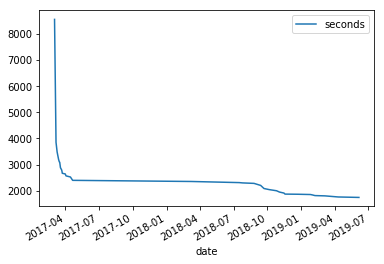

In [5]:
df.plot.line(x="date", y="seconds")

The above graph does the job, but can I do better?

In [6]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import Span, Label
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.io import output_notebook

In [7]:
output_notebook()

Loading BokehJS ...

In [8]:
annotations = pd.DataFrame(
    columns=["date", "event"],
    data= [
        (pd.datetime(2017, 3, 3), "Breath of the Wild released"),
        (pd.datetime(2018, 8, 18, 20, 0, 17), "Bullet time bounce glitch discovered")
    ],
)

annotations["yaxis_position"] = [
    140, 60
]

annotations

,date,event,yaxis_position
0,2017-03-03 00:00:00,Breath of the Wild released,140
1,2018-08-18 20:00:17,Bullet time bounce glitch discovered,60


In [9]:
p = figure(
    title="Breath of the Wild Speedrun records",
    x_axis_type="datetime",
    
    tools="box_zoom,reset,save",
    tooltips=[
        ("Time", "@canonical_time"),
        ("Achieved by", "@player"),
        ("On", "@canonical_date"),
    ],
    height=400,
    width=1600,
)
p.yaxis.axis_label = "Time"
p.yaxis.ticker = [20, 25, 30, 35, 40, 45, 50, 55, 60, 142]
p.yaxis.major_label_overrides = {
    60: "1 hr",
    142: "2 hrs 22 mins",
}

p.xaxis.axis_label = "Date"
p.xaxis.formatter = DatetimeTickFormatter(
    days="%B %e",
    months="%B %y",
    years="%Y",
)

# p.hover.mode="vline"

source = ColumnDataSource(df)

p.line(x="date", y="minutes", source=source, line_width=3, alpha=0.5)
p.circle(x="date", y="minutes", source=source, size=10)

# p.line(x=[pd.datetime(2019, 3, 3)] * 5, y=[20, 40, 60, 80, 100])

# Any annotations to add to our data?
for annotation in annotations.itertuples():
    p.add_layout(Span(
        location=annotation.date,
        dimension="height", line_color="green", line_dash="dashed", line_width=1,
    ))
    
    p.add_layout(Label(
        x=annotation.date,
        y=annotation.yaxis_position,
        text=annotation.event,
        x_offset=10,
        text_font_size="9pt",
    ))

show(p)

In [10]:
df

,seconds,date,time,minutes,player,canonical_date,canonical_time
0,8567.00,2017-03-03 12:00:00,02:22:47,142.783333,SethBling,"March 03, 17",0 days 02:22:47
1,3853.40,2017-03-07 12:00:00,01:04:13.400000,64.223333,Venick,"March 07, 17",0 days 01:04:13.400000
2,3481.00,2017-03-10 12:00:00,00:58:01,58.016667,gymnast86,"March 10, 17",0 days 00:58:01
3,3193.00,2017-03-14 12:00:00,00:53:13,53.216667,gymnast86,"March 14, 17",0 days 00:53:13
4,3100.00,2017-03-16 12:00:00,00:51:40,51.666667,gymnast86,"March 16, 17",0 days 00:51:40
5,3090.00,2017-03-17 12:00:00,00:51:30,51.500000,Baltan,"March 17, 17",0 days 00:51:30
6,2879.00,2017-03-19 12:00:00,00:47:59,47.983333,sva,"March 19, 17",0 days 00:47:59
7,2800.50,2017-03-22 12:00:00,00:46:40.500000,46.675000,Baltan,"March 22, 17",0 days 00:46:40.500000
8,2751.00,2017-03-23 12:00:00,00:45:51,45.850000,sva,"March 23, 17",0 days 00:45:51
9,2665.10,2017-03-24 12:00:00,00:44:25.100000,44.418333,ChaoticAce,"March 24, 17",0 days 00:44:25.100000
